## RAG Retrieval Augmented Generation
### given any source of data convert it into a form in which we can query the data. For eg if PDF file is given then read that pdf file convert it into a form like vector, and then make querying possible.
### 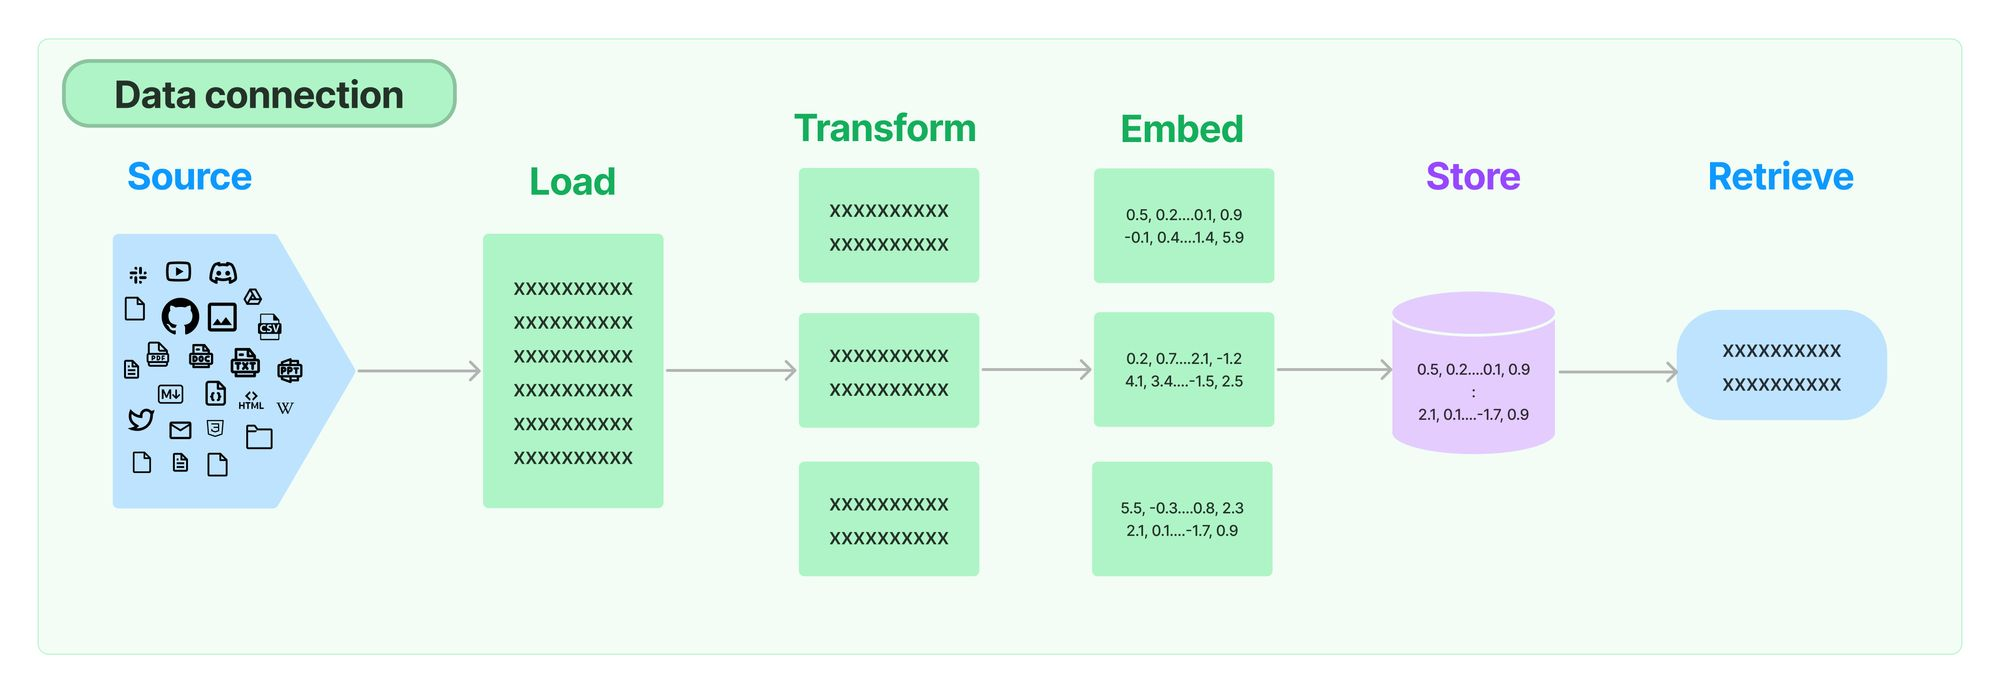

In [1]:
#Data ingestion(reading from various data formats like excel csv pdf text)
from langchain_community.document_loaders import TextLoader
loader = TextLoader("speech.txt")
text_documents = loader.load()
text_documents

[Document(metadata={'source': 'speech.txt'}, page_content='The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.\n\nJust because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel confident, conduct our operations as belligerents without passion and ourselves observe with proud punctilio the principles of right and of fair play we profess to be fighting for.\n\nâ€¦\n\nIt will be all the easier for us to conduct ourselves as belligerents in a high spirit of right and fairness 

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY")

In [3]:
#web based loader
from langchain_community.document_loaders import WebBaseLoader
import bs4

# load, chunk and index the content of the HTML page
loader = WebBaseLoader(web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
                       bs_kwargs = dict(parse_only = bs4.SoupStrainer(
                           class_=("post-title","post-content", "post-header")
                                                                      )))
text_documents = loader.load()
text_documents


USER_AGENT environment variable not set, consider setting it to identify your requests.


[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistake

In [4]:
# pdf reader
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("Fire1.pdf")
text = loader.load()
text

[Document(metadata={'source': 'Fire1.pdf', 'page': 0}, page_content='ORIGINAL ARTICLE\nAn improved fire detection approach based on YOLO-v8 for smart\ncities\nFatma M. Talaat1•Hanaa ZainEldin2\nReceived: 28 March 2023 / Accepted: 28 June 2023 / Published online: 28 July 2023\n/C211The Author(s) 2023\nAbstract\nFires in smart cities can have devastating consequences, causing damage to property, and endangering the lives of citizens.Traditional ﬁre detection methods have limitations in terms of accuracy and speed, making it challenging to detect ﬁres in\nreal time. This paper proposes an improved ﬁre detection approach for smart cities based on the YOLOv8 algorithm, called\nthe smart ﬁre detection system (SFDS), which leverages the strengths of deep learning to detect ﬁre-speciﬁc features in realtime. The SFDS approach has the potential to improve the accuracy of ﬁre detection, reduce false alarms, and be cost-\neffective compared to traditional ﬁre detection methods. It can also be exte

In [5]:
#transforming the data into small chunks
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap = 200)
document = text_splitter.split_documents(text)
document[:5]

[Document(metadata={'source': 'Fire1.pdf', 'page': 0}, page_content='ORIGINAL ARTICLE\nAn improved fire detection approach based on YOLO-v8 for smart\ncities\nFatma M. Talaat1•Hanaa ZainEldin2\nReceived: 28 March 2023 / Accepted: 28 June 2023 / Published online: 28 July 2023\n/C211The Author(s) 2023\nAbstract\nFires in smart cities can have devastating consequences, causing damage to property, and endangering the lives of citizens.Traditional ﬁre detection methods have limitations in terms of accuracy and speed, making it challenging to detect ﬁres in\nreal time. This paper proposes an improved ﬁre detection approach for smart cities based on the YOLOv8 algorithm, called\nthe smart ﬁre detection system (SFDS), which leverages the strengths of deep learning to detect ﬁre-speciﬁc features in realtime. The SFDS approach has the potential to improve the accuracy of ﬁre detection, reduce false alarms, and be cost-\neffective compared to traditional ﬁre detection methods. It can also be exte

In [6]:
#vector embedding and vector store
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.vectorstores import Chroma
db = Chroma.from_documents(document[1:8], OllamaEmbeddings())


In [8]:
query = "What has become increaingly important to ensure?"
result = db.similarity_search(query)
result[0].page_content

'instance, a ﬁre detection system (FFireNet) was proposedby [8] using the MobileNetV2 model to classify forest ﬁres.\nAdditionally, Mukhiddinov et al. [ 9] proposed an early\nwildﬁre smoke detection system based on improvedYOLOv5 photographs taken by unmanned aerial vehicles\n(UAVs). A ﬁre detection technique based on an improved\nYOLO V4 is proposed in [ 10]. According to the experi-\nmental results, the proposed technology can be applied\neffectively to defend smart cities and to keep track of ﬁres\nin urban areas.\nConvolutional neural networks (CNNs) have shown\nremarkable performance in image recognition tasks,\nincluding object detection. The You Only Look Once(YOLO) algorithm is one such CNN-based object detection\nframework that has been widely used in computer vision\napplications. The latest YOLO v8 version has shown sig-niﬁcant improvements in accuracy and speed, making it a\nviable option for real-time ﬁre detection in smart cities.\nThis paper presented an early ﬁre detect